# Simple Linear Regression

## Importing the libraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [67]:
dataset = pd.read_csv('Salary_Data.csv')


In [68]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [70]:
#Five number summary: helps in visulatization/outliers detection
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [71]:
dataset.isnull().apply(pd.value_counts).T

,False
YearsExperience,30
Salary,30


Text(0.5, 20.80000000000002, 'Independent variable')

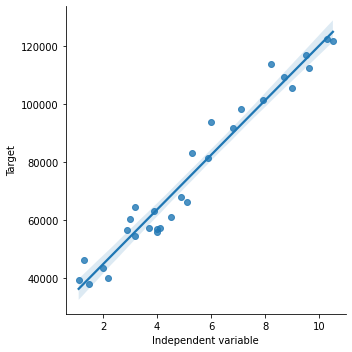

In [72]:
#Plotting a scatter plot to visualize the linear relationship
sns.lmplot(x="YearsExperience", y="Salary", data=dataset, order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

In [73]:
corr=dataset.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


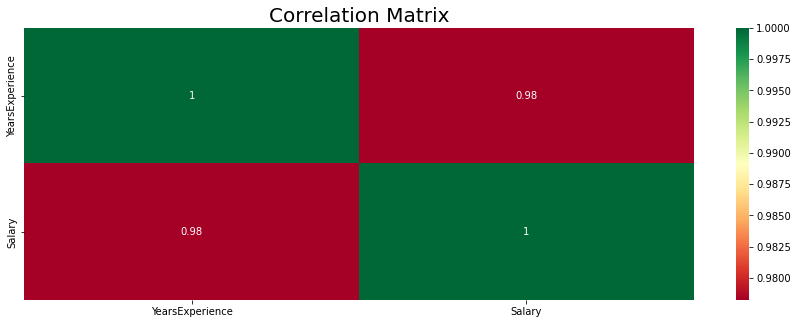

In [74]:
plt.figure(figsize=(15,5))
sns.heatmap(corr,cmap='RdYlGn', annot=True)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

In [75]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 0)

In [77]:
X_train.shape

(21, 1)

In [78]:
X_test.shape

(9, 1)

## Training the Simple Linear Regression model on the Training set

In [79]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [80]:
y_pred = regressor.predict(X_test)

## Visualising the results

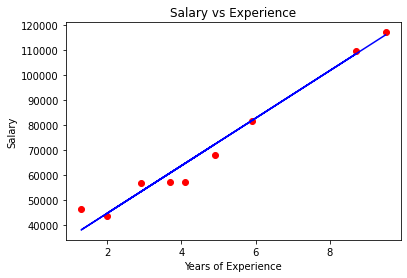

In [81]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

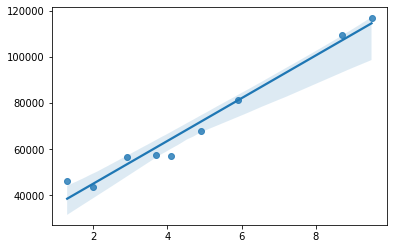

In [82]:
sns.regplot(x=X_test,y=y_test)

##Evaluation matrix

In [83]:
print(regressor.intercept_)

print(regressor.coef_)

25577.617977721537
[9507.01909337]


In [84]:
df_comp = pd.DataFrame({'Actual_value':y_test.flatten(),'Predicted_value':y_pred.flatten()})

In [85]:
df_comp.head()

,Actual_value,Predicted_value
0,116969.0,115894.299365
1,43525.0,44591.656164
2,81363.0,81669.030629
3,109431.0,108288.684090
4,46205.0,37936.742799


In [90]:
from sklearn import metrics

In [86]:
regressor.score(X_test,y_test)*100

96.98760388335602

In [87]:
regressor.score(X_train,y_train)*100

95.12654846158482

In [88]:
metrics.r2_score(y_test,y_pred)*100

96.987603883356

In [89]:
#Adjusent R2 score
(1-(1-metrics.r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100

96.55726158097828